In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import plotly.offline as py
import seaborn as sb
py.init_notebook_mode(connected=True)
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm,tree
from sklearn.metrics import classification_report,accuracy_score,roc_auc_score,precision_recall_curve,confusion_matrix,precision_score,confusion_matrix
import copy
#Performing OverSample using SMOTE(Synthetic Minority Over Sampling Technique)
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
smote=SMOTE()

In [2]:
#Data defination
attrition = pd.read_csv('3_sheets1.csv')

attrition['Attrition']=np.where(attrition['Attrition']=='No', #condition
                 0, #value if conditioemployee_data.csvn is true
                 1)
attrition=attrition.drop(['EmployeeCount', 'StandardHours','EmployeeNumber'], axis=1)

In [3]:

numerical_df=attrition.select_dtypes(include=np.number)
categorical_df=attrition.select_dtypes(exclude=np.number)
numeric_cols=list(numerical_df.columns)
categorical_cols=list(categorical_df.columns)



# for n in categorical_cols:
#     print(pd.crosstab(hr_data['Attrition'],hr_data[n],normalize='columns'))

categorical_df_dummies=pd.get_dummies(attrition[categorical_cols],drop_first=True)
final_df=pd.concat([categorical_df_dummies,numerical_df],axis=1)

In [4]:
num_timestamps = 3
final_df.to_csv('new_converted_data.csv')
attritions = np.array_split(final_df,num_timestamps)
for i in range(num_timestamps-1,-1,-1):
    attritions[i].index = range(0,1470)


In [5]:
hr_data = attritions[0]

# corr_matrix = hr_data.corr()
# f , ax = plt.subplots(figsize=(20,12))
# sb.heatmap(corr_matrix,vmax=0.8, annot=True)

In [6]:
final_df = attritions[0]

In [7]:
y=final_df.Attrition
X=final_df.drop(['Attrition'], axis=1)

#Method that applies model on the data and Predict the attrition
def model(mod,model_name,x_tr,y_tr,x_tes,y_te):
    mod.fit(x_tr,y_tr)
    pred_dt=mod.predict(x_tes)
    print("     ",model_name,"      ")
    print("Accuracy ",accuracy_score(pred_dt,y_te))
    print("ROC_AUC  ",roc_auc_score(pred_dt,y_te))
    cm=confusion_matrix(pred_dt,y_te)
    print("Confusion Matrix  \n",cm)
    print("                    Classification Report \n",classification_report(pred_dt,y_te))

In [8]:
X_sm, y_sm=smote.fit_sample(X,y)
X_train_sm,X_test_sm,y_train_sm,y_test_sm=train_test_split(X_sm,y_sm,test_size=0.2,random_state=100)

clf=RandomForestClassifier(n_estimators=10,max_depth=4)
model(clf,"Random Forest",X_train_sm,y_train_sm,X,y)

      Random Forest       
Accuracy  0.8210884353741497
ROC_AUC   0.6820869164619165
Confusion Matrix  
 [[1077  107]
 [ 156  130]]
                    Classification Report 
               precision    recall  f1-score   support

           0       0.87      0.91      0.89      1184
           1       0.55      0.45      0.50       286

   micro avg       0.82      0.82      0.82      1470
   macro avg       0.71      0.68      0.69      1470
weighted avg       0.81      0.82      0.81      1470



In [9]:
converted = pd.DataFrame(X_sm,columns=X.columns.values)
X_train_sm,X_test_sm,y_train_sm,y_test_sm=train_test_split(converted,y_sm,test_size=0.2,random_state=100)

clf=RandomForestClassifier(n_estimators=10,max_depth=4)
model(clf,"Random Forest",X_train_sm,y_train_sm,X,y)
# converted.head()

      Random Forest       
Accuracy  0.8238095238095238
ROC_AUC   0.6820566468820621
Confusion Matrix  
 [[1088  114]
 [ 145  123]]
                    Classification Report 
               precision    recall  f1-score   support

           0       0.88      0.91      0.89      1202
           1       0.52      0.46      0.49       268

   micro avg       0.82      0.82      0.82      1470
   macro avg       0.70      0.68      0.69      1470
weighted avg       0.82      0.82      0.82      1470



In [10]:

converted['SatistactionJobEnviroment'] = converted.JobSatisfaction*converted.EnvironmentSatisfaction
converted['SatistactionJobRelation'] = converted.JobSatisfaction*converted.RelationshipSatisfaction
converted['SatistactionRelationEnviroment'] = converted.RelationshipSatisfaction*converted.EnvironmentSatisfaction

X['SatistactionJobEnviroment'] = converted['SatistactionJobEnviroment']
X['SatistactionJobRelation'] = converted['SatistactionJobRelation']
X['SatistactionRelationEnviroment'] = converted['SatistactionRelationEnviroment']

In [11]:
X_train_sm,X_test_sm,y_train_sm,y_test_sm=train_test_split(converted,y_sm,test_size=0.2,random_state=100)
clf=RandomForestClassifier(n_estimators=10,max_depth=4)
model(clf,"Random Forest",X_train_sm,y_train_sm,X,y)

      Random Forest       
Accuracy  0.8081632653061225
ROC_AUC   0.6730265367819953
Confusion Matrix  
 [[1048   97]
 [ 185  140]]
                    Classification Report 
               precision    recall  f1-score   support

           0       0.85      0.92      0.88      1145
           1       0.59      0.43      0.50       325

   micro avg       0.81      0.81      0.81      1470
   macro avg       0.72      0.67      0.69      1470
weighted avg       0.79      0.81      0.80      1470



In [12]:
x

NameError: name 'x' is not defined

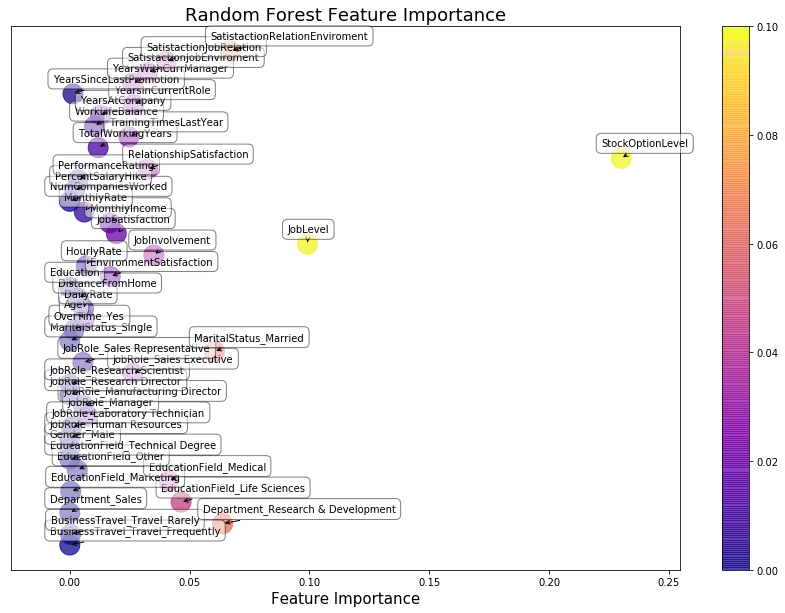

In [15]:
# Scatter plot
y1 = converted.columns
x = clf.feature_importances_
plt.figure(figsize=(15, 10))
plt.scatter(x, y1, c=x, vmin=0, vmax=0.10, s=400, alpha = 0.75, cmap='plasma')
plt.colorbar()
#plt.ylabel('Attributes')
plt.xlabel('Feature Importance', fontsize=15)
plt.yticks([])
#plt.xticks(rotation=90)
plt.title('Random Forest Feature Importance', fontsize=18)
labels = y1
for label, x, y1 in zip(labels, x, y1):
    plt.annotate(
        label,
        xy=(x, y1), xytext=(-20, 20),
        textcoords='offset points', ha='left', va='top',
        bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
plt.show()

In [14]:
y1

Index(['BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'OverTime_Yes', 'Age',
       'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'Train